In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
import FileIO
using .ToolBox
using .Geometry

In [2]:
slave_meta_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/annotation/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.xml"
slave_pod_path = "/Users/simon/Data/Sentinel/S1A_OPER_AUX_POEORB_OPOD_20170410T121606_V20170320T225942_20170322T005942.EOF"
slave_data_path = "/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

"/Users/simon/Data/Sentinel/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE/measurement/s1a-iw3-slc-vv-20170321t054035-20170321t054103-015786-019fee-006.tiff"

In [3]:
master_view = [2000:6000,1000:9000]
small = 5001:8001

5001:8001

In [4]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [5]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [6]:
slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[1]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[1]);

master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[1]);

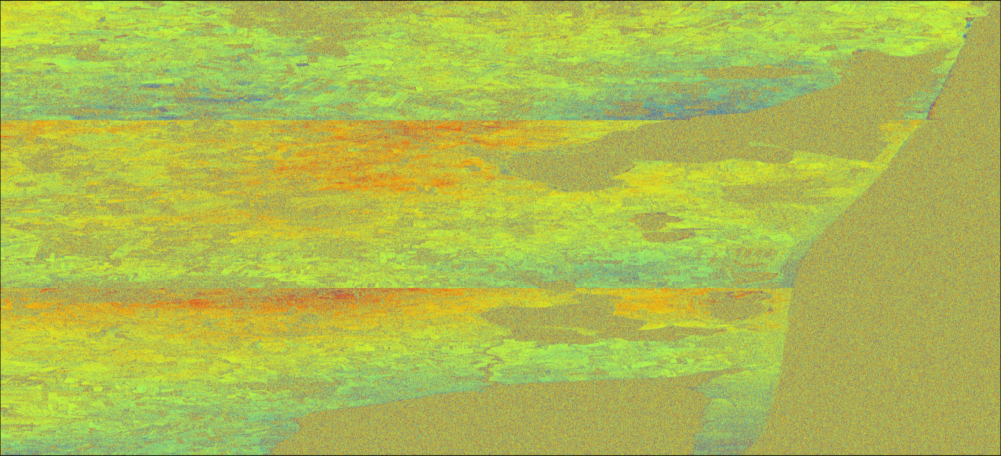

In [7]:
 phase_img = SlcUtil.plot_phase(master_data .* conj.(slave_data).*flat)

In [8]:
FileIO.save("Discussion_AB_infero.jpg",phase_img)

In [9]:
FileIO.save("Discussion_AB_infero_small.jpg",phase_img[:,small])